<a href="https://colab.research.google.com/github/Harshini-D-V/Traffic/blob/main/Traffic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

In [2]:
!pip install pyttsx3

In [3]:
import osmnx as ox

# Define the area (city or coordinates) you want to extract data for
place_name = "Manhattan, New York, USA"

# Extract pedestrian paths
pedestrian_graph = ox.graph_from_place(place_name, network_type='walk')

# Convert to GeoDataFrame and save
pedestrian_nodes, pedestrian_edges = ox.graph_to_gdfs(pedestrian_graph)

In [4]:
pedestrian_nodes

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30807314,40.790720,-73.963576,4,NaN,NaN,POINT (-73.96358 40.79072)
30978747,40.774267,-73.973425,4,NaN,NaN,POINT (-73.97343 40.77427)
30978752,40.774754,-73.974383,4,NaN,NaN,POINT (-73.97438 40.77475)
42421728,40.798048,-73.960044,3,traffic_signals,NaN,POINT (-73.96004 40.79805)
42421731,40.798654,-73.961474,4,traffic_signals,NaN,POINT (-73.96147 40.79865)
...,...,...,...,...,...,...
12121646028,40.756627,-74.000262,1,NaN,NaN,POINT (-74.00026 40.75663)
12121646029,40.756162,-74.000615,4,NaN,NaN,POINT (-74.00062 40.75616)
12126165482,40.794041,-73.972523,1,NaN,NaN,POINT (-73.97252 40.79404)


In [5]:
pedestrian_edges

osmid      highway  oneway reversed   length  \
u           v           key                                                     
30807314    2057103273  0     46613689    bridleway   False    False  159.255   
            6579409036  0     46613689    bridleway   False     True   58.144   
            4303265016  0    147089927         path   False    False   10.509   
            1203806304  0    147089927         path   False     True   17.645   
30978747    42442164    0    429504381         path   False    False   18.987   
...                                ...          ...     ...      ...      ...   
12133465278 10168838114 0     54689817  residential   False    False    4.713   
            42452630    0     54689817  residential   False     True    2.221   
12133691788 4890633694  0      5670816   pedestrian   False    False   10.681   
            4890633707  0    539024459  residential   False     True   69.609   
            4890633710  0    539024459  residential   False    False    5.955   

                                                                      geometry  \
u           v           key                                                      
30807314    2057103273  0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
            6579409036  0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
            4303265016  0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
            1203806304  0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
30978747    42442164    0    LINESTRING (-73.97343 40.77427, -73.97365 40.7...   
...                                                                        ...   
12133465278 10168838114 0    LINESTRING (-74.00767 40.70429, -74.00771 40.7...   
            42452630    0    LINESTRING (-74.00767 40.70429, -74.00765 40.7...   
12133691788 4890633694  0    LINESTRING (-74.00526 40.72304, -74.00532 40.7...   
            4890633707  0    LINESTRING (-74.00526 40.72304, -74.00608 40.7...   
            4890633710  0    LINESTRING (-74.00526 40.72304, -74.00525 40.7...   

                                              name maxspeed lanes access  ref  \
u           v           key                                                     
30807314    2057103273  0                      NaN      NaN   NaN    NaN  NaN   
            6579409036  0                      NaN      NaN   NaN    NaN  NaN   
            4303265016  0                      NaN      NaN   NaN    NaN  NaN   
            1203806304  0                      NaN      NaN   NaN    NaN  NaN   
30978747    42442164    0    Central Park Driveway      NaN   NaN    NaN  NaN   
...                                            ...      ...   ...    ...  ...   
12133465278 10168838114 0             Front Street   25 mph     1    NaN  NaN   
            42452630    0             Front Street   25 mph     1    NaN  NaN   
12133691788 4890633694  0          Sullivan Street      NaN   NaN    NaN  NaN   
            4890633707  0             Grand Street   25 mph   NaN    NaN  NaN   
            4890633710  0             Grand Street   25 mph   NaN    NaN  NaN   

                            service tunnel bridge width junction est_width  \
u           v           key                                                  
30807314    2057103273  0       NaN    NaN    NaN   NaN      NaN       NaN   
            6579409036  0       NaN    NaN    NaN   NaN      NaN       NaN   
            4303265016  0       NaN    NaN    NaN   NaN      NaN       NaN   
            1203806304  0       NaN    NaN    NaN   NaN      NaN       NaN   
30978747    42442164    0       NaN    NaN    NaN   NaN      NaN       NaN   
...                             ...    ...    ...   ...      ...       ...   
12133465278 10168838114 0       NaN    NaN    NaN   NaN      NaN       NaN   
            42452630    0       NaN    NaN    NaN   NaN      NaN       NaN   
12133691788 4890633694  0       NaN    NaN    NaN   NaN      NaN       NaN   


In [6]:
import requests

# TomTom Traffic API URL
url = "https://api.tomtom.com/traffic/services/4/flowSegmentData/absolute/10/json"

# API request parameters
params = {
    'key': 'fnRyXj5sY1yD4rVDN2wC8neLbdgsNNtI',
    'point': '40.79072,-73.96358',
}

# Send the request to the TomTom Traffic API
response = requests.get(url, params=params)
tomtom_traffic_data = response.json()

# Print or process the traffic data
print(tomtom_traffic_data)


{'flowSegmentData': {'frc': 'FRC4', 'currentSpeed': 17, 'freeFlowSpeed': 17, 'currentTravelTime': 18, 'freeFlowTravelTime': 18, 'confidence': 1, 'roadClosure': False, 'coordinates': {'coordinate': [{'latitude': 40.794691942882665, 'longitude': -73.97187536907659}, {'latitude': 40.79439014704782, 'longitude': -73.97209799242486}, {'latitude': 40.794021340014424, 'longitude': -73.97237157774447}]}, '@version': 'traffic-service-flow 1.0.118'}}


In [7]:
tomtom_traffic_data

{'flowSegmentData': {'frc': 'FRC4',
  'currentSpeed': 17,
  'freeFlowSpeed': 17,
  'currentTravelTime': 18,
  'freeFlowTravelTime': 18,
  'confidence': 1,
  'roadClosure': False,
  'coordinates': {'coordinate': [{'latitude': 40.794691942882665,
     'longitude': -73.97187536907659},
    {'latitude': 40.79439014704782, 'longitude': -73.97209799242486},
    {'latitude': 40.794021340014424, 'longitude': -73.97237157774447}]},
  '@version': 'traffic-service-flow 1.0.118'}}

In [8]:
import numpy as np

# Define the bounding box coordinates
north, south, west, east = 40.8820, 40.6800, -74.0180, -73.9050

# Define the step size for the grid (latitude and longitude increments)
lat_step = 0.01  # Smaller step size for more detailed coverage
lon_step = 0.01

# Generate the grid of latitude and longitude points
lats = np.arange(south, north, lat_step)
lons = np.arange(west, east, lon_step)

# Create a list of grid points (latitude, longitude pairs)
grid_points = [(lat, lon) for lat in lats for lon in lons]

import requests

# TomTom Traffic API URL
url = "https://api.tomtom.com/traffic/services/4/flowSegmentData/absolute/10/json"

# Your API key
api_key = 'fnRyXj5sY1yD4rVDN2wC8neLbdgsNNtI'

# Function to fetch traffic data for a specific point
def get_traffic_data_for_point(lat, lon):
    params = {
        'key': api_key,
        'point': f'{lat},{lon}',  # Latitude,Longitude
    }
    response = requests.get(url, params=params)
    return response.json()

# Fetch traffic data for all grid points
all_traffic_data = []
for lat, lon in grid_points:
    traffic_data = get_traffic_data_for_point(lat, lon)
    all_traffic_data.append(traffic_data)

# Example: Print the traffic data for the first point
print(all_traffic_data[0])


{'flowSegmentData': {'frc': 'FRC1', 'currentSpeed': 62, 'freeFlowSpeed': 62, 'currentTravelTime': 170, 'freeFlowTravelTime': 170, 'confidence': 1, 'roadClosure': False, 'coordinates': {'coordinate': [{'latitude': 40.70565059834619, 'longitude': -74.01517426921407}, {'latitude': 40.70555007689052, 'longitude': -74.01520779682679}, {'latitude': 40.70531268807194, 'longitude': -74.01529228641077}, {'latitude': 40.704923752367606, 'longitude': -74.01543310238407}, {'latitude': 40.70481916315977, 'longitude': -74.01546528889227}, {'latitude': 40.704691762353605, 'longitude': -74.01550954534102}, {'latitude': 40.70453748314586, 'longitude': -74.01556318952133}, {'latitude': 40.70433497525783, 'longitude': -74.01561683370163}, {'latitude': 40.704192831763166, 'longitude': -74.01565572573237}, {'latitude': 40.70403728055502, 'longitude': -74.01569461776309}, {'latitude': 40.7039581704262, 'longitude': -74.01571473433071}, {'latitude': 40.70382943358198, 'longitude': -74.01574289752537}, {'lati

In [9]:
all_traffic_data[0]

{'flowSegmentData': {'frc': 'FRC1',
  'currentSpeed': 62,
  'freeFlowSpeed': 62,
  'currentTravelTime': 170,
  'freeFlowTravelTime': 170,
  'confidence': 1,
  'roadClosure': False,
  'coordinates': {'coordinate': [{'latitude': 40.70565059834619,
     'longitude': -74.01517426921407},
    {'latitude': 40.70555007689052, 'longitude': -74.01520779682679},
    {'latitude': 40.70531268807194, 'longitude': -74.01529228641077},
    {'latitude': 40.704923752367606, 'longitude': -74.01543310238407},
    {'latitude': 40.70481916315977, 'longitude': -74.01546528889227},
    {'latitude': 40.704691762353605, 'longitude': -74.01550954534102},
    {'latitude': 40.70453748314586, 'longitude': -74.01556318952133},
    {'latitude': 40.70433497525783, 'longitude': -74.01561683370163},
    {'latitude': 40.704192831763166, 'longitude': -74.01565572573237},
    {'latitude': 40.70403728055502, 'longitude': -74.01569461776309},
    {'latitude': 40.7039581704262, 'longitude': -74.01571473433071},
    {'latitud

In [10]:
import pandas as pd

# Initialize an empty list to store traffic data
traffic_data_combined = []

# Extract relevant data and combine
for traffic_data in all_traffic_data:
    if 'flowSegmentData' in traffic_data:
        segment = traffic_data['flowSegmentData']
        coordinates = segment['coordinates']['coordinate']
        for coordinate in coordinates:
          traffic_data_combined.append({
              'latitude': coordinate['latitude'],
              'longitude': coordinate['longitude'],
              'currentSpeed': segment['currentSpeed'],
              'freeFlowSpeed': segment['freeFlowSpeed'],
              'currentTravelTime': segment['currentTravelTime'],
              'freeFlowTravelTime': segment['freeFlowTravelTime'],
              'confidence': segment['confidence'],
              'roadClosure': segment['roadClosure']
          })

# Convert to a DataFrame for easier manipulation
df_traffic = pd.DataFrame(traffic_data_combined)

# Save the combined data to a CSV file
# df_traffic.to_csv("manhattan_traffic_data.csv", index=False)


In [11]:
import geopandas as gpd
from shapely.geometry import Point

# Convert the traffic data into GeoDataFrame
geometry = [Point(xy) for xy in zip(df_traffic['longitude'], df_traffic['latitude'])]
gdf_traffic = gpd.GeoDataFrame(df_traffic, geometry=geometry)

# Set the coordinate reference system (CRS) to match OSM data
gdf_traffic.crs = {'init': 'epsg:4326'}  # WGS84 (lat/lon)
gdf_traffic = gdf_traffic.to_crs(pedestrian_edges.crs)


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
df_traffic

,latitude,longitude,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
0,40.705651,-74.015174,62,62,170,170,1.0,False
1,40.705550,-74.015208,62,62,170,170,1.0,False
2,40.705313,-74.015292,62,62,170,170,1.0,False
3,40.704924,-74.015433,62,62,170,170,1.0,False
4,40.704819,-74.015465,62,62,170,170,1.0,False
...,...,...,...,...,...,...,...,...
19719,40.877266,-73.905888,21,21,203,203,1.0,False
19720,40.877226,-73.906019,21,21,203,203,1.0,False
19721,40.877209,-73.906097,21,21,203,203,1.0,False
19722,40.877185,-73.906167,21,21,203,203,1.0,False


In [13]:
# Perform spatial join between traffic data and OSM edges
# 'nearest' join will map each traffic point to the closest road segment
gdf_combined = gpd.sjoin_nearest(gdf_traffic, pedestrian_edges, how='left', distance_col='dist_to_road')

# View the combined data
print(gdf_combined.head())


/usr/local/lib/python3.10/dist-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


    latitude  longitude  currentSpeed  freeFlowSpeed  currentTravelTime  \
0  40.705651 -74.015174            62             62                170   
0  40.705651 -74.015174            62             62                170   
1  40.705550 -74.015208            62             62                170   
2  40.705313 -74.015292            62             62                170   
3  40.704924 -74.015433            62             62                170   

   freeFlowTravelTime  confidence  roadClosure                    geometry  \
0                 170         1.0        False  POINT (-74.01517 40.70565)   
0                 170         1.0        False  POINT (-74.01517 40.70565)   
1                 170         1.0        False  POINT (-74.01521 40.70555)   
2                 170         1.0        False  POINT (-74.01529 40.70531)   
3                 170         1.0        False  POINT (-74.01543 40.70492)   

   index_right0  ...  ref  service tunnel bridge  width junction  est_width  \
0

In [14]:
import geopandas as gpd
from shapely.geometry import Point

# Ensure both GeoDataFrames have the same CRS
print(gdf_traffic.crs)
print(pedestrian_edges.crs)

# Convert both to a projected CRS (UTM Zone 18N for New York)
gdf_traffic_proj = gdf_traffic.to_crs(epsg=32618)
pedestrian_edges_proj = pedestrian_edges.to_crs(epsg=32618)

# Perform the spatial join in the projected CRS
gdf_combined_proj = gpd.sjoin_nearest(gdf_traffic_proj, pedestrian_edges_proj, how='left', distance_col='dist_to_road')

# Convert back to the original geographic CRS if needed
gdf_combined = gdf_combined_proj.to_crs(gdf_traffic.crs)

# View the combined data
print(gdf_combined.head())

epsg:4326
epsg:4326
    latitude  longitude  currentSpeed  freeFlowSpeed  currentTravelTime  \
0  40.705651 -74.015174            62             62                170   
0  40.705651 -74.015174            62             62                170   
1  40.705550 -74.015208            62             62                170   
2  40.705313 -74.015292            62             62                170   
3  40.704924 -74.015433            62             62                170   

   freeFlowTravelTime  confidence  roadClosure                    geometry  \
0                 170         1.0        False  POINT (-74.01517 40.70565)   
0                 170         1.0        False  POINT (-74.01517 40.70565)   
1                 170         1.0        False  POINT (-74.01521 40.70555)   
2                 170         1.0        False  POINT (-74.01529 40.70531)   
3                 170         1.0        False  POINT (-74.01543 40.70492)   

   index_right0  ...  ref  service tunnel bridge  width junc

In [15]:
# Update edge weights based on traffic data
# For example, you can calculate the travel time or penalty for congestion
gdf_combined['travel_time'] = gdf_combined['length'] / gdf_combined['currentSpeed']

# Explode the 'osmid' column if it contains lists
gdf_combined_exploded = gdf_combined.explode('osmid')

# Ensure 'osmid' is now a scalar value
print(gdf_combined_exploded['osmid'].apply(type).unique())

# Now, map the traffic data back to the original OSM edges GeoDataFrame
pedestrian_edges['travel_time'] = gdf_combined_exploded.groupby('osmid')['travel_time'].mean()

# Fill any missing travel times with default values (e.g., using default speed)
default_speed = 30  # assuming 30 km/h as default speed
pedestrian_edges['travel_time'].fillna(pedestrian_edges['length'] / default_speed, inplace=True)


[<class 'int'>]


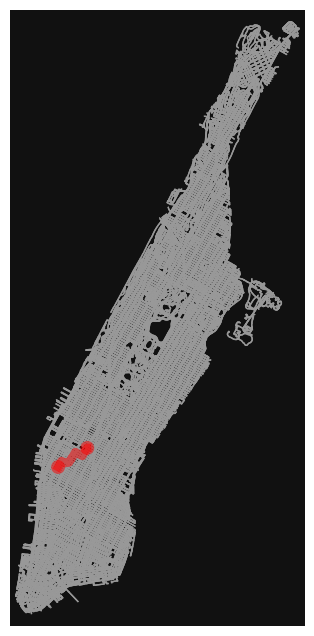

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
# Implement routing (e.g., shortest path) using updated travel times
import networkx as nx

# Convert the graph with updated travel times
G = ox.graph_from_gdfs(gdf_nodes=pedestrian_nodes, gdf_edges=pedestrian_edges)

# Find the shortest path between two nodes (with real-time traffic info)
origin_node = ox.distance.nearest_nodes(G, -74.002507, 40.744717 )  # Example: near Times Square
destination_node = ox.distance.nearest_nodes(G,  -73.990937,40.750356)  # Example: near Wall Street

# Use Dijkstra's algorithm for shortest path based on travel time
route = nx.shortest_path(G, origin_node, destination_node, weight='travel_time')

# Plot the route on the map
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0)


In [17]:
!pip install folium

In [18]:
import folium
from shapely.geometry import LineString

# Create a folium map centered around the midpoint of the route
route_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in route]
midpoint = (sum(lat for lat, lon in route_coords) / len(route_coords),
            sum(lon for lat, lon in route_coords) / len(route_coords))

# Initialize the map
m = folium.Map(location=midpoint, zoom_start=15)

# Add route to the map
route_line = LineString(route_coords)
folium.PolyLine(locations=[(lat, lon) for lon, lat in route_coords],
                color='blue',
                weight=5,
                opacity=0.7).add_to(m)

# Optionally add markers for start and end points
folium.Marker(location=route_coords[0], popup='Start', icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=route_coords[-1], popup='End', icon=folium.Icon(color='red')).add_to(m)

# Save the map to an HTML file
m.save("route_map.html")


In [19]:
route_edges = list(zip(route[:-1], route[1:]))

In [20]:
def get_edge_data(graph, u, v):
    # Retrieve edge data (e.g., road name)
    return graph[u][v][0]  # Adjust if keys are used

def get_instructions(edge_data):
    # Customize this function based on the data available
    instructions = []
    if 'name' in edge_data:
        instructions.append(f"Follow {edge_data['name']}.")
    if 'highway' in edge_data:
        instructions.append(f"This is a {edge_data['highway']} road.")
    return ' '.join(instructions)


In [21]:
import numpy as np

def get_edge_coordinates(graph, u, v):
    """ Get the coordinates of the start and end of an edge. """
    u_coords = graph.nodes[u]['y'], graph.nodes[u]['x']
    v_coords = graph.nodes[v]['y'], graph.nodes[v]['x']
    return u_coords, v_coords

def calculate_bearing(start_coords, end_coords):
    """ Calculate the bearing (angle) between two coordinates. """
    lat1, lon1 = np.radians(start_coords)
    lat2, lon2 = np.radians(end_coords)

    dlon = lon2 - lon1
    y = np.sin(dlon) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)

    bearing = np.degrees(np.arctan2(y, x))
    return (bearing + 360) % 360

def get_turn_direction(prev_coords, current_coords, next_coords):
    """ Determine the turn direction based on bearings. """
    prev_bearing = calculate_bearing(prev_coords[0], prev_coords[1])
    current_bearing = calculate_bearing(current_coords[0], current_coords[1])
    next_bearing = calculate_bearing(current_coords[1], next_coords[1])

    turn_angle = (next_bearing - current_bearing + 360) % 360

    if 0 <= turn_angle < 45 or 315 <= turn_angle < 360:
        return 'Continue straight'
    elif 45 <= turn_angle < 135:
        return 'Turn right'
    elif 135 <= turn_angle < 225:
        return 'Turn around'
    elif 225 <= turn_angle < 315:
        return 'Turn left'
    return 'Continue straight'


In [22]:
!pip install gtts

In [23]:
from gtts import gTTS
import os

def provide_audio_instructions(instructions):
    instruction = ' '.join(instructions)
    tts = gTTS(text=instruction, lang='en')
    tts.save("instruction.mp3")
    os.system("mpg321 instruction.mp3")  # or use any MP3 player command suitable for your OS

instructions = [
    "Start at your current location and head towards 5th Avenue.",
    "Continue on 5th Avenue for approximately 200 meters.",
    "Turn right onto 7th Avenue.",
    "Continue on 7th Avenue for approximately 300 meters.",
    "Turn left onto Main Street.",
    "Your destination is on the right."
]

provide_audio_instructions(instructions)


In [24]:
import math

def calculate_bearing(pointA, pointB):
    """Calculate the bearing between two points."""
    lat1 = math.radians(pointA[1])
    lat2 = math.radians(pointB[1])

    diff_long = math.radians(pointB[0] - pointA[0])

    x = math.sin(diff_long) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(diff_long))

    initial_bearing = math.atan2(x, y)
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

def determine_turn_direction(prev_coords, current_coords, next_coords):
    """ Determine the turn direction based on bearings. """
    prev_bearing = calculate_bearing(prev_coords[0], prev_coords[1])
    current_bearing = calculate_bearing(current_coords[0], current_coords[1])
    next_bearing = calculate_bearing(current_coords[1], next_coords[1])

    turn_angle = (next_bearing - current_bearing + 360) % 360

    if 0 <= turn_angle < 45 or 315 <= turn_angle < 360:
        return 'Continue straight'
    elif 45 <= turn_angle < 135:
        return 'Turn right'
    elif 135 <= turn_angle < 225:
        return 'Turn around'
    elif 225 <= turn_angle < 315:
        return 'Turn left'
    return 'Continue straight'

def generate_correct_instructions(route_edges, graph):
    instructions = []
    previous_road_name = None
    total_distance = 0
    previous_coords = None

    for i, (u, v) in enumerate(route_edges):
        edge_data = get_edge_data(graph, u, v)
        road_name = edge_data.get('name', 'the road ahead')
        length = edge_data.get('length', 0)
        curr_coords = edge_data.get('geometry', None).coords if 'geometry' in edge_data else None

        if previous_road_name and previous_road_name != road_name:
            if i > 0 and curr_coords and previous_coords:
                next_edge = route_edges[i + 1] if i + 1 < len(route_edges) else None
                next_coords = get_edge_data(graph, v, next_edge[1]).get('geometry', None).coords if next_edge else None
                if next_coords:
                    turn_direction = determine_turn_direction(previous_coords, curr_coords, next_coords)
                    instructions.append(f"{turn_direction} onto {road_name}.")

            if total_distance > 0:
                instructions.append(f"Continue on {previous_road_name} for about {int(total_distance)} meters.")

            total_distance = length
            previous_road_name = road_name
        else:
            total_distance += length
            previous_road_name = road_name

        previous_coords = curr_coords

        if i == len(route_edges) - 1:
            if total_distance > 0:
                instructions.append(f"Continue on {road_name} for about {int(total_distance)} meters.")

    instructions.append("You have reached your destination.")
    return instructions

# Example usage
instructions = generate_correct_instructions(route_edges, G)
for i, instruction in enumerate(instructions):
    print(f"Step {i+1}: {instruction}")


Step 1: Turn left onto West 23rd Street.
Step 2: Continue on the road ahead for about 232 meters.
Step 3: Continue straight onto the road ahead.
Step 4: Continue on West 23rd Street for about 151 meters.
Step 5: Continue straight onto 8th Avenue.
Step 6: Continue on the road ahead for about 313 meters.
Step 7: Turn left onto West 29th Street.
Step 8: Continue on 8th Avenue for about 243 meters.
Step 9: Turn right onto the road ahead.
Step 10: Continue on West 29th Street for about 11 meters.
Step 11: Continue straight onto 7th Avenue.
Step 12: Continue on the road ahead for about 265 meters.
Step 13: Continue straight onto the road ahead.
Step 14: Continue on 7th Avenue for about 313 meters.
Step 15: Continue on the road ahead for about 10 meters.
Step 16: You have reached your destination.


In [25]:
!pip install osmnx pyttsx3 folium gtts

import osmnx as ox
import networkx as nx
import folium
from IPython.display import display, clear_output
import ipywidgets as widgets

# Define input widgets
place_input = widgets.Text(value='Manhattan, New York, USA', description='Place:')
api_key_input = widgets.Text(value='your_api_key_here', description='API Key:')
start_lat = widgets.FloatText(value=40.744717, description='Start Latitude:')
start_lon = widgets.FloatText(value=-74.002507, description='Start Longitude:')
end_lat = widgets.FloatText(value=40.750356, description='End Latitude:')
end_lon = widgets.FloatText(value=-73.990937, description='End Longitude:')
generate_button = widgets.Button(description='Generate Route')

# Display input widgets
display(place_input, api_key_input, start_lat, start_lon, end_lat, end_lon, generate_button)

# Function to handle button click
def on_button_click(b):
    clear_output()  # Clear previous output
    display(place_input, api_key_input, start_lat, start_lon, end_lat, end_lon, generate_button)

    # Use inputs from widgets
    origin_coords = (start_lat.value, start_lon.value)
    destination_coords = (end_lat.value, end_lon.value)

    # Generate pedestrian graph for a simple map area
    G = ox.graph_from_point(origin_coords, dist=1000, network_type='walk')
    origin_node = ox.distance.nearest_nodes(G, start_lon.value, start_lat.value)
    destination_node = ox.distance.nearest_nodes(G, end_lon.value, end_lat.value)
    route = nx.shortest_path(G, origin_node, destination_node, weight='length')

    # Plot the route on the map
    route_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in route]
    m = folium.Map(location=[(start_lat.value + end_lat.value) / 2, (start_lon.value + end_lon.value) / 2], zoom_start=15)
    folium.PolyLine(locations=route_coords, color='blue', weight=5).add_to(m)

    # Save the map to an HTML file
    m.save("route_map.html")

    # Display the map as HTML
    display(m)

# Bind the button click event to the function
generate_button.on_click(on_button_click)

Text(value='Manhattan, New York, USA', description='Place:')

Text(value='your_api_key_here', description='API Key:')

FloatText(value=40.744717, description='Start Latitude:')

FloatText(value=-74.002507, description='Start Longitude:')

FloatText(value=40.750356, description='End Latitude:')

FloatText(value=-73.990937, description='End Longitude:')

Button(description='Generate Route', style=ButtonStyle())